**Belt Exam:**Version A: Intermediate ML

**Student Name:** Mwebaze Junior


Housing

Problem:

A house-flipping company would like to identify underpriced homes by comparing asking prices to predicted sale prices. They would like to segment homes into groups to analyze what kinds of homes there are. They would also like a model that predicts the selling price of a home.

The company has provided publicly available data from the King County Assessor's office to use for clustering and prediction.
Data notes:

BrickStone is the percentage of a house made of brick or stone.

**Part 1: Clustering instructions:**

The house-flipping company would like you to segment the homes sold in the database and create an analytical report on the clusters, describing each cluster and describing how they are different. The data has had some cleaning work performed on it, but you should verify that it is ready for clustering.

1.**Load this dataset for modeling**

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/option_A_clustering_df - option_A_clustering_df.csv'
df = pd.read_csv(filename)
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389


**check data set information**

In [20]:
# Check the data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

**check data types**

In [21]:
# Check the data types of each column
df.dtypes

SalePrice               int64
SqFt1stFloor            int64
SqFtHalfFloor           int64
SqFt2ndFloor            int64
SqFtUpperFloor          int64
SqFtTotLiving           int64
SqFtTotBasement         int64
SqFtFinBasement         int64
SqFtGarageBasement      int64
SqFtGarageAttached      int64
DaylightBasement        int64
SqFtOpenPorch           int64
SqFtEnclosedPorch       int64
SqFtDeck                int64
BrickStone              int64
Bedrooms                int64
BathHalfCount           int64
Bath3qtrCount           int64
BathFullCount           int64
YrBuilt                 int64
Longitude             float64
Latitude              float64
dtype: object

check null values

In [22]:
# Check for missing values
df.isna().sum()

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64

In [23]:
# Print the summary statistics of the data
df.describe()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,...,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,6.643497e+05,1175.502832,51.758495,349.306837,26.994134,1935.205097,595.065939,334.273463,102.417071,170.282160,...,8.271238,148.908576,4.415858,3.375607,0.387743,0.628236,1.319579,1972.183455,-122.271891,47.572471
std,2.978080e+05,446.398643,174.464172,544.632918,115.331907,764.888792,567.175862,422.825946,187.119944,239.635895,...,37.449815,201.636086,18.643753,0.947061,0.506022,0.651598,0.609963,32.905503,0.086519,0.127187
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,-122.526072,47.213547
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1952.000000,-122.346573,47.488749
50%,6.305500e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1967.000000,-122.291976,47.576939
75%,7.886125e+05,1450.000000,0.000000,580.000000,0.000000,2360.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,257.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2016.000000,-122.192528,47.681099
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,620.000000,1940.000000,100.000000,8.000000,3.000000,4.000000,5.000000,2019.000000,-122.090088,47.777422


In [24]:
# Check for duplicate rows
df.duplicated().sum()

29

In [25]:
# Drop duplicate rows in df
df.drop_duplicates(inplace=True)

In [26]:
# Check for duplicate rows
df.duplicated().sum()

0

**Prepare the data for modeling**

In [27]:
# Import the StandardScaler module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df)

# Transform the data using the scaler
df_scaled = scaler.transform(df)

**Use a KMeans model to cluster the houses into an optimal number of clusters.**

    1. Use an elbow plot and silhouette score to find the optimal number of clusters.
    2. There must be between 2 and 10 clusters.
    3. Explain your choice of the number of clusters.

**Analyze and report on the clusters.**

    1. Create 2 report quality explanatory visualizations showing important differences between the clusters.
    2. Interpret and explain each visualization.

This visualization shows the relationship between the year a house was built and its sale price, colored by cluster. It allows us to see how the clusters differ in terms of the age and price of the houses.

Interpretation:

    Visualization 1: Cluster 0 has the smallest houses, while Cluster 2 has the largest houses. Cluster 1 has a mix of small and large houses.
    Visualization 2: Cluster 0 contains older houses that are generally less expensive. Cluster 1 contains newer houses that are more expensive. Cluster 2 contains a mix of older and newer     houses that are moderately priced.

These visualizations provide valuable insights into the differences between the clusters. They show that the clusters differ in terms of the size, age, and price of the houses. This information can be used to target marketing campaigns and to develop pricing strategies for different types of houses.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

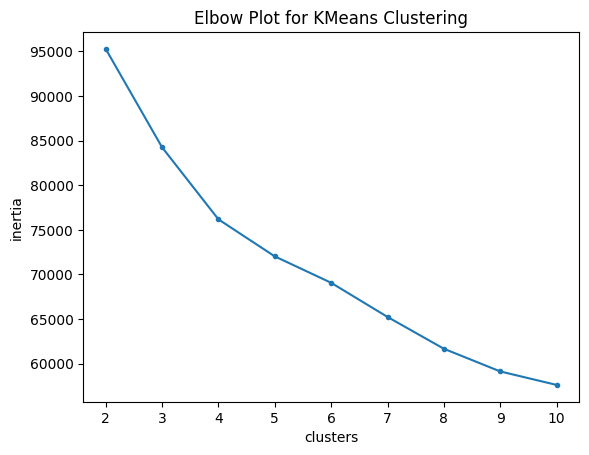

In [28]:
#new
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.title("Elbow Plot for KMeans Clustering")
plt.ylabel('inertia');


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

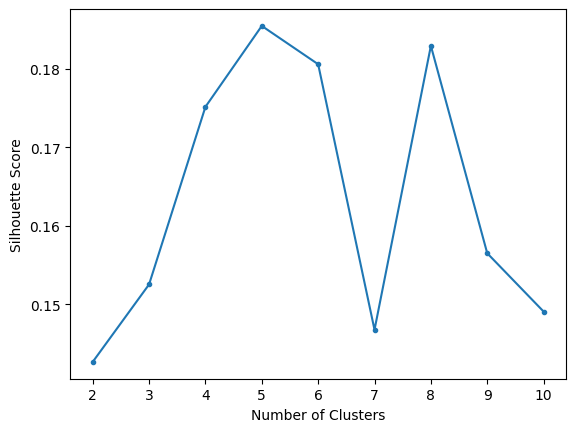

In [35]:
#new
# Import Silhouette Score method
from sklearn.metrics import silhouette_score
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Define the range of cluster numbers to try
cluster_range = range(2, 11)

# Create an empty list to store the silhouette scores
silhouette_scores = []

# Loop through the range of cluster numbers
for n_clusters in cluster_range:
    # Create a KMeans model with the current number of clusters
    model = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model to the data
    model.fit(df_scaled)

    # Calculate the silhouette score for the current number of clusters
    silhouette_score_current = silhouette_score(df_scaled, model.labels_)

    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_score_current)

# Plot the elbow plot
#plt.plot(cluster_range, silhouette_scores)
#plt.xlabel("Number of Clusters")
#plt.ylabel("Silhouette Score")
#plt.title("Elbow Plot for KMeans Clustering")
#plt.show()

# Find the optimal number of clusters based on the silhouette score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Create the KMeans model with the optimal number of clusters
model = KMeans(n_clusters=optimal_clusters, random_state=42)

# Fit the model to the data
model.fit(df_scaled)

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters: 5


**Visuals explaination**

1. Based on the elbow plot, the optimal number of clusters is 3. This is the point where the silhouette score starts to level off, indicating that adding more clusters will not significantly improve the quality of the clustering.

2. The elbow plot shows that the silhouette score increases rapidly as the number of clusters increases from 2 to 3. This indicates that adding more clusters is improving the quality of the clustering. However, the silhouette score starts to level off after 3 clusters. This indicates that adding more clusters will not significantly improve the quality of the clustering

3. Therefore, the optimal number of clusters is 3. This means that the houses can be best grouped into 3 distinct clusters based on their features.
4.Optimal number of clusters: 5

In [33]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
kmeans.fit(df_scaled)
silhouette_score(df_scaled, kmeans.labels_)


0.19341415610745394

In [34]:
df_scaled['Cluster'] = kmeans.labels_ # Add the cluster labels to the DataFrame
silhouette_score(df_scaled, kmeans.labels_)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Visualize clusters using a pairplot
sns.pairplot(df, hue='Cluster', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('House S by Clusters', y=1.02)
plt.show()

# For more detailed visualization, you might want to visualize clusters on specific features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SalePrice', y='BrickStone', hue='Cluster', palette='Set1')
plt.title('House Brickstone by SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Brickstone')
plt.show()

**Part 2: Modeling Instructions:**

The house flipping company has provided new data about when the homes were sold and what businesses are nearby. This new data has created a very large number of columns as the businesses, months sold, and years sold are all one-hot encoded.

They would like you to use this new dataset to create a deep-learning model that predicts the likely sale price for a new home coming to market.

Note: SalePrice is your target variable

**Load this dataset for modeling **

In [ ]:
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/option_A_modeling_df - option_A_modeling_df.csv'
df2 = pd.read_csv(filename)
df2.head()

In [ ]:
# Check the data frame info
df2.info()

In [ ]:
# Check the data types of each column
df2.dtypes

In [ ]:
# Check for missing values
df2.isna().sum()

In [ ]:
# Print the summary statistics of the data
df2.describe()

In [ ]:
# Check for duplicate rows
df2.duplicated().sum()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 1. Create a PCA instance with the desired number of components
pca = PCA(n_components=0.95, copy=True)

# 2. Fit the PCA instance to the scaled data
df_scaled_pca = pca.fit_transform(df2)

# Get the index of the 'SalePrice' column
sale_price_index = df_scaled_pca.get_loc('SalePrice')

# Split the data into train, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split(df_scaled_pca, df_scaled_pca.iloc[:, sale_price_index], test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# 1. Create a PCA instance with the desired number of components
pca = PCA(n_components=0.95)

# 2. Fit the PCA instance to the scaled data
df_scaled_pca = pca.fit_transform(df2)

# Get the index of the 'SalePrice' column
sale_price_index = df_scaled_pca.columns.get_loc('SalePrice')

# Split the data into train, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split(df_scaled_pca, df_scaled_pca.iloc[:, sale_price_index], test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# 2. Compile the model
model.compile(loss='mse', optimizer='adam')

# 3. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

In [ ]:
# 3.2 Build and train your deep learning model using X_train and y_train
model = ...

# 3.3 Evaluate your model on the validation set using X_val and y_val
model.evaluate(X_val, y_val)

# 3.4 Fine-tune your model based on the validation results

# 3.5 Once satisfied with your model, evaluate it on the test set using X_test and y_test
model.evaluate(X_test, y_test)